In [1]:
import sys
import numpy as np
import pandas as pd
import csv

In [2]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"
ans_path = "./data/ans.csv"

In [3]:
train_raw = pd.read_csv(train_path, sep=',', encoding='big5')
test_data = pd.read_csv(test_path, sep=',', encoding='big5', names=['id','index','1','2','3','4','5','6','7','8','9'])

In [4]:
train_1 = train_raw.iloc[:, 3:3+6]
train_2 = train_raw.iloc[:, 9:9+6]
train_3 = train_raw.iloc[:, 15:15+6]
attr_index = train_raw.iloc[:, 2]

In [5]:
train_1 = pd.concat([train_1, attr_index], axis=1)
train_2 = pd.concat([train_2, attr_index], axis=1)
train_3 = pd.concat([train_3, attr_index], axis=1)

In [6]:
y_1 = train_1[train_1["測項"] == "PM2.5"]
y_2 = train_2[train_2["測項"] == "PM2.5"]
y_3 = train_3[train_3["測項"] == "PM2.5"]
x_1 = y_1.iloc[:, 0:5].values.astype('float64')
x_2 = y_2.iloc[:, 0:5].values.astype('float64')
x_3 = y_3.iloc[:, 0:5].values.astype('float64')
X = np.concatenate((x_1, x_2, x_3), axis=0)
tmp = np.ones(X.shape[0])
X = np.c_[tmp, X]
del tmp
y_1 = y_1['5'].values
y_2 = y_2['11'].values
y_3 = y_3['17'].values
Y = np.concatenate((y_1, y_2, y_3), axis=0)
Y = Y.astype('float64')
Y = Y[:,np.newaxis]

In [8]:
x_test = test_data[test_data['index']=='PM2.5']
x_test = x_test.iloc[:, 6:].values.astype('float64')
tmp = np.ones(x_test.shape[0])
x_test = np.c_[tmp, x_test]
del tmp

In [11]:
def training(x, y, w, iteration=1000, alpha=1e-3, eps=1e-3):
    total = len(y)
    # gradient descent
    rmse = []
    for i in range(iteration):
        y_pre = np.dot(x,w)
        loss = y_pre - y
        w_new = w - alpha / total * np.dot(x.T, loss)
        rmse.append((np.sqrt(np.dot(loss.T, loss) / total)).item())
        if(np.max(np.abs(w_new - w)) < eps):
            break
        w = w_new
    return rmse, w

In [12]:
w = np.zeros((X.shape[1], 1))

In [13]:
rmse, w_end = training(X, Y, w, iteration=6000, alpha=3e-5, eps=1e-10)

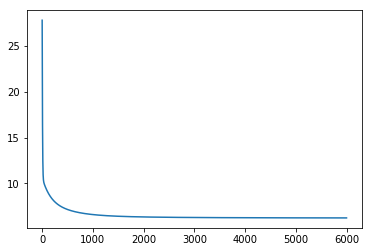

In [15]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(range(len(rmse)), rmse)
plt.show()

In [16]:
y_test_pre = np.dot(x_test, w_end)

In [17]:
y_test = pd.read_csv(ans_path, sep=',')

In [18]:
y_test = y_test['value'].values.astype('float64')
y_test = y_test[:, np.newaxis]

In [19]:
rmse_end = np.sqrt(((y_test - y_test_pre)**2).sum() / len(y_test))
rmse_end

6.7857909943929995

In [20]:
x_test.shape

(240, 6)